# PART A

# DOMAIN: Botanical Research

# CONTEXT: 
University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at
various stages of growth. They already have have invested on curating sample images. They require an automation which can create a
classifier capable of determining a plant's species from a photo.

# DATA DESCRIPTION: 
The dataset comprises of images from 12 plant species.
Source: https://www.kaggle.com/c/plant-seedlings-classification/data.

# PROJECT OBJECTIVE: 
To create a classifier capable of determining a plant's species from a photo.

## 1.1 Import and Understand the data

### Part 1. 1 a - Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.

In [1]:
images_path = "plant-seedlings-classification.zip"
from zipfile import ZipFile
with ZipFile(images_path,'r') as zip:
  zip.extractall("")

Extracted the Data set to one new folder named: flowers which has 2 subfoulders - Train & Test

### Part 1.1 b - Map the images from train folder with train labels to form a DataFrame.
Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image..

In [2]:
%pwd


'C:\\Users\\hp\\Computer vision'

In [3]:
#pip install tqdm

In [4]:
from pathlib import Path
imgpath = 'plant-seedlings-classification'
print(Path(images_path ).rglob('*.png'))

<generator object Path.rglob at 0x000001F592EDFAC0>


In [5]:
import pandas as pd
from pathlib import Path
import glob
from tqdm import tqdm
import cv2

imgpath = 'C:\\Users\\hp\\Computer vision\\plant-seedlings-classification\\train\*\*.png'
files = glob.glob(imgpath)

Images = []
Label = []
name = []
j=1
num = len(files)

#obtain images and resizing obtain labels
for img in tqdm (files):
    Images.append(cv2.imread(img)) #image
    
    Label.append(img.split('\\')[-2]) #species
    name.append(img.split('\\')[-1]) #Get Image name

100%|██████████████████████████████████████████████████████████████████████████████| 4750/4750 [00:57<00:00, 82.18it/s]


In [6]:
data= pd.DataFrame({'Imagename':name,'Label':Label,'Actualimage':Images})

In [7]:
data.shape

(4750, 3)

In [8]:
data.head()

,Imagename,Label,Actualimage
0,0050f38b3.png,Black-grass,"[[[27, 50, 80], [18, 42, 71], [36, 57, 83], [4..."
1,0183fdf68.png,Black-grass,"[[[37, 43, 55], [37, 43, 54], [40, 46, 57], [4..."
2,0260cffa8.png,Black-grass,"[[[24, 32, 45], [21, 30, 44], [22, 30, 45], [2..."
3,05eedce4d.png,Black-grass,"[[[51, 84, 108], [56, 89, 112], [54, 88, 110],..."
4,075d004bc.png,Black-grass,"[[[165, 162, 162], [165, 161, 163], [160, 157,..."


### Part 1.1 c - Write a function that will select n random images and display images along with its species

[1335   74 3527 4733 3513 2835 2855 1219 4041 4383]


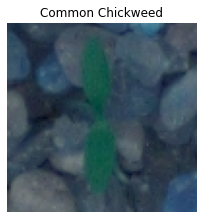

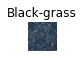

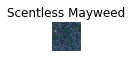

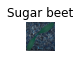

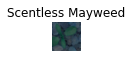

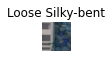

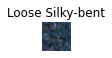

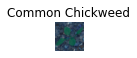

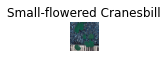

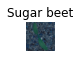

In [9]:
import matplotlib.pyplot as plt
import numpy as np
rand = np.random.randint(0, len(Images), 10)
print(rand)
plt.figure(figsize=(40, 40))

for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(Images[j])
    plt.title('{}'.format(Label[j]))
    plt.axis('off')
    plt.show()

## 1.2. Data preprocessing

### Part 1.2 a Create X & Y from the DataFrame

In [10]:
X= data['Actualimage']
y= data['Label']

In [11]:
print(len(X), len(y))

4750 4750


In [12]:
X

0       [[[27, 50, 80], [18, 42, 71], [36, 57, 83], [4...
1       [[[37, 43, 55], [37, 43, 54], [40, 46, 57], [4...
2       [[[24, 32, 45], [21, 30, 44], [22, 30, 45], [2...
3       [[[51, 84, 108], [56, 89, 112], [54, 88, 110],...
4       [[[165, 162, 162], [165, 161, 163], [160, 157,...
                              ...                        
4745    [[[98, 94, 97], [93, 88, 94], [87, 82, 86], [8...
4746    [[[35, 63, 92], [38, 67, 96], [34, 64, 94], [1...
4747    [[[44, 56, 72], [52, 63, 75], [53, 65, 75], [4...
4748    [[[144, 141, 145], [143, 139, 143], [146, 142,...
4749    [[[71, 90, 99], [65, 81, 94], [68, 83, 97], [6...
Name: Actualimage, Length: 4750, dtype: object

In [13]:
y

0       Black-grass
1       Black-grass
2       Black-grass
3       Black-grass
4       Black-grass
           ...     
4745     Sugar beet
4746     Sugar beet
4747     Sugar beet
4748     Sugar beet
4749     Sugar beet
Name: Label, Length: 4750, dtype: object

### Part 1.2 b - Encode labels of the images.

In [14]:
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import matplotlib.pyplot as plt

# encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(y)
print("Classes:" + str(le.classes_))
encodedlabel = le.transform(y)

# Make labels categorical
convertedlabels = to_categorical(encodedlabel)
classes = convertedlabels.shape[1]
print("Number of classes:" + str(classes))

Classes:['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes:12


In [15]:
convertedlabels.shape

(4750, 12)

### Part 1.2 c - Unify shape of all the images.

In [16]:
shape=[]
for i in X:
    shape.append(cv2.resize(i,(128,128)))

In [17]:
shape=np.asarray(shape)
shape.shape

(4750, 128, 128, 3)

### Part 1.2 d - Normalise all the images

In [18]:
X_normalize = (shape/255)
X_normalize.shape

(4750, 128, 128, 3)

## 1.3. Model training

### Part 1.3 a - Split the data into train and test data.

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_normalize,convertedlabels,test_size=0.3,random_state=42)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


### Part 1.3 b - Create new CNN architecture to train the model.

In [21]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [22]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 128)       0

### Part 1.3 c - Train the model on train data and validate on test data.

In [23]:
histroy = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=8, verbose=2)

Epoch 1/30
416/416 - 93s - loss: 2.0616 - accuracy: 0.3002 - val_loss: 1.4654 - val_accuracy: 0.5263 - 93s/epoch - 223ms/step
Epoch 2/30
416/416 - 88s - loss: 1.4498 - accuracy: 0.5035 - val_loss: 1.1386 - val_accuracy: 0.6077 - 88s/epoch - 210ms/step
Epoch 3/30
416/416 - 88s - loss: 1.2088 - accuracy: 0.5786 - val_loss: 1.0925 - val_accuracy: 0.6414 - 88s/epoch - 211ms/step
Epoch 4/30
416/416 - 88s - loss: 1.0420 - accuracy: 0.6481 - val_loss: 0.9148 - val_accuracy: 0.6926 - 88s/epoch - 213ms/step
Epoch 5/30
416/416 - 88s - loss: 0.9602 - accuracy: 0.6785 - val_loss: 0.8984 - val_accuracy: 0.7123 - 88s/epoch - 211ms/step
Epoch 6/30
416/416 - 88s - loss: 0.8225 - accuracy: 0.7137 - val_loss: 0.8881 - val_accuracy: 0.7116 - 88s/epoch - 211ms/step
Epoch 7/30
416/416 - 88s - loss: 0.7551 - accuracy: 0.7392 - val_loss: 0.8029 - val_accuracy: 0.7284 - 88s/epoch - 211ms/step
Epoch 8/30
416/416 - 87s - loss: 0.7134 - accuracy: 0.7534 - val_loss: 1.2588 - val_accuracy: 0.6442 - 87s/epoch - 210

In [37]:
import tensorflow as tf
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(128,128,3),
                   pooling='avg',classes=12,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [44]:

resnet_model.add(Flatten())

resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dropout(0.25))

resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dropout(0.25))

resnet_model.add(Dense(classes, activation='softmax'))

resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

resnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_13 (Dense)            (None, 512)               1049088   
                                                                 
 dense_14 (Dense)            (None, 12)                6156      
                                                                 
 flatten_4 (Flatten)         (None, 12)                0         
                                                                 
 dense_15 (Dense)            (None, 128)               1664      
                                                                 
 dropout_6 (Dropout)         (None, 128)              

In [38]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(12, activation='softmax'))

In [39]:
resnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_13 (Dense)            (None, 512)               1049088   
                                                                 
 dense_14 (Dense)            (None, 12)                6156      
                                                                 
Total params: 24,642,956
Trainable params: 1,055,244
Non-trainable params: 23,587,712
_________________________________________________________________


In [45]:
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10,verbose=2)

Epoch 1/10
104/104 - 85s - loss: 2.4386 - accuracy: 0.1329 - val_loss: 2.3921 - val_accuracy: 0.1200 - 85s/epoch - 821ms/step
Epoch 2/10
104/104 - 78s - loss: 2.3925 - accuracy: 0.1489 - val_loss: 2.3596 - val_accuracy: 0.1663 - 78s/epoch - 746ms/step
Epoch 3/10
104/104 - 78s - loss: 2.3658 - accuracy: 0.1567 - val_loss: 2.3534 - val_accuracy: 0.1656 - 78s/epoch - 748ms/step
Epoch 4/10
104/104 - 78s - loss: 2.3632 - accuracy: 0.1603 - val_loss: 2.3425 - val_accuracy: 0.1425 - 78s/epoch - 752ms/step
Epoch 5/10
104/104 - 78s - loss: 2.3486 - accuracy: 0.1621 - val_loss: 2.3563 - val_accuracy: 0.1544 - 78s/epoch - 752ms/step
Epoch 6/10
104/104 - 79s - loss: 2.3370 - accuracy: 0.1645 - val_loss: 2.3240 - val_accuracy: 0.1663 - 79s/epoch - 757ms/step
Epoch 7/10
104/104 - 79s - loss: 2.3476 - accuracy: 0.1660 - val_loss: 2.4088 - val_accuracy: 0.1249 - 79s/epoch - 759ms/step
Epoch 8/10
104/104 - 80s - loss: 2.3480 - accuracy: 0.1684 - val_loss: 2.4111 - val_accuracy: 0.1228 - 80s/epoch - 766

In [48]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.4
classifier.add(Dropout(0.4))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 12 neuron to predict the categorical classifcation
classifier.add(Dense(units = 12, activation = 'softmax'))

classifier.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 128)     

In [52]:

classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = classifier.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10,verbose=2)

Epoch 1/10
104/104 - 45s - loss: 0.0459 - accuracy: 0.9838 - val_loss: 1.5514 - val_accuracy: 0.7740 - 45s/epoch - 435ms/step
Epoch 2/10
104/104 - 44s - loss: 0.0753 - accuracy: 0.9780 - val_loss: 1.2900 - val_accuracy: 0.7663 - 44s/epoch - 422ms/step
Epoch 3/10
104/104 - 42s - loss: 0.0364 - accuracy: 0.9883 - val_loss: 1.6108 - val_accuracy: 0.7782 - 42s/epoch - 402ms/step
Epoch 4/10
104/104 - 42s - loss: 0.0616 - accuracy: 0.9823 - val_loss: 1.4489 - val_accuracy: 0.7782 - 42s/epoch - 402ms/step
Epoch 5/10
104/104 - 42s - loss: 0.0606 - accuracy: 0.9802 - val_loss: 1.4094 - val_accuracy: 0.7853 - 42s/epoch - 403ms/step
Epoch 6/10
104/104 - 42s - loss: 0.0186 - accuracy: 0.9940 - val_loss: 1.4010 - val_accuracy: 0.7958 - 42s/epoch - 404ms/step
Epoch 7/10
104/104 - 43s - loss: 0.0540 - accuracy: 0.9844 - val_loss: 1.9713 - val_accuracy: 0.7628 - 43s/epoch - 410ms/step
Epoch 8/10
104/104 - 42s - loss: 0.0335 - accuracy: 0.9883 - val_loss: 1.7369 - val_accuracy: 0.7839 - 42s/epoch - 406

Testing the model on validation dataset
45/45 [==============================] - 4s 88ms/step
Classification Report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.28      0.24      0.26        87
           1       0.76      0.94      0.84       120
           2       0.90      0.81      0.85        86
           3       0.95      0.94      0.95       193
           4       0.68      0.55      0.61        65
           5       0.75      0.84      0.79       143
           6       0.68      0.70      0.69       198
           7       0.88      0.73      0.80        70
           8       0.84      0.74      0.79       136
           9       0.81      0.79      0.80        58
          10       0.93      0.92      0.92       151
          11       0.75      0.82      0.78       118

    accuracy                           0.78      1425
   macro avg       0.77      0.75      0.76  

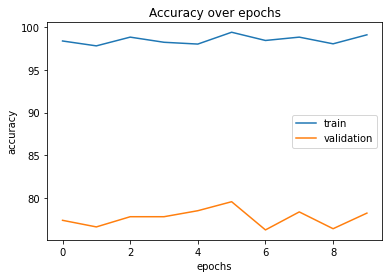

In [62]:
from sklearn.metrics import classification_report
plt.plot(np.array(history.history['accuracy'])*100)
plt.plot(np.array(history.history['val_accuracy'])*100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
print('Testing the model on validation dataset')
predictions= np.argmax(classifier.predict(X_test),axis=1)
rounded_y = np.argmax(y_test,axis=1)
print('Classification Report'); print('--'*40)
print(classification_report(rounded_y,predictions))
plt.legend(['train','validation'])
plt.title('Accuracy over epochs')
plt.show()

### Part 1.3 d - Select a random image and print actual label and predicted label for the same.

1/1 [==============================] - 0s 24ms/step
is predicted 8
is labeled 8
predicted probabilities: [[3.5961976e-21 1.4461983e-07 3.6651482e-13 3.3480165e-07 4.1433176e-15
  3.5565861e-17 1.4600132e-20 3.4160801e-12 9.9999952e-01 7.6844148e-10
  1.2215621e-14 5.0175716e-13]]


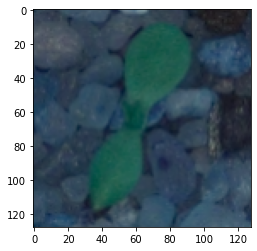

In [64]:
image_index = 27
plt.imshow(X_test[image_index])
pred= classifier.predict(np.reshape(X_test[image_index],[1,128,128,3]))
print("is predicted",pred.argmax())
print("is labeled",rounded_y[image_index])
print("predicted probabilities:",pred)

# PART B

# DOMAIN: Botanical Research

# CONTEXT: 
University X is currently undergoing some research involving understanding the characteristics of flowers. They already have
have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s species from a photo.

# DATA DESCRIPTION: 
The dataset comprises of images from 17 plant species.

# PROJECT OBJECTIVE: 
To experiment with various approaches to train an image classifier to predict type of flower from the image.

# STEPS and TASKS

### 2.1. Import and Understand the data

### Part 2.1 a - Import and read oxflower17 dataset from tflearn and split into X and Y while loading

In [132]:
!pip install tflearn

In [133]:
import tflearn
import tflearn.datasets.oxflower17 as oxflower17

In [134]:
X, y = oxflower17.load_data(resize_pics=(224,224))

### Part 2.1 b - Print Number of images and shape of the images

In [135]:
print(X.shape, y.shape)

(1360, 224, 224, 3) (1360,)


### Part 2.1 c - Print count of each class from y

In [143]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{0: 80, 1: 80, 2: 80, 3: 80, 4: 80, 5: 80, 6: 80, 7: 80, 8: 80, 9: 80, 10: 80, 11: 80, 12: 80, 13: 80, 14: 80, 15: 80, 16: 80}


In [114]:
import numpy as np
print("Total labels: {}".format(len(np.unique(y))))
print("Labels: {}".format(y))

Total labels: 17
Labels: [15  2 12 ... 11  5  1]


## 2.2. Image Exploration & Transformation [Learning purpose - Not related to final model]

### Part 2.2 a - Display 5 random images.

[685 446 993 472 793]


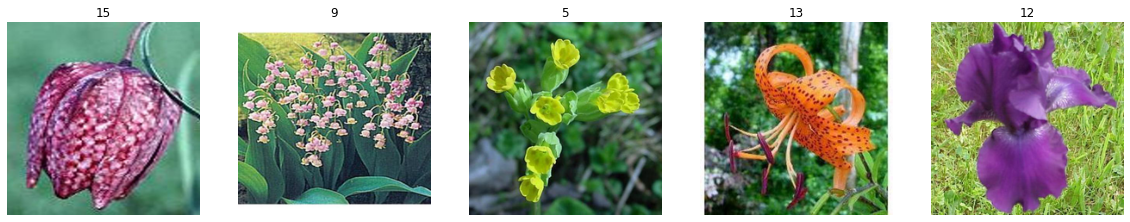

In [7]:
# visualizing the random images in the dataset along with their labels

# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
rand = np.random.randint(0, len(X), 5) # Generating 5 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

### Part 2.2 b - Select any image from the dataset and assign it to a variable.

### Part 2.2 c - Transform the image into grayscale format and display the same

### Part 2.2 d - Apply a filter to sharpen the image and display the image before and after sharpening.

### Part 2.2 e - Apply a filter to blur the image and display the image before and after blur.

### Part 2.2 f - Display all the 4 images from above questions besides each other to observe the difference.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


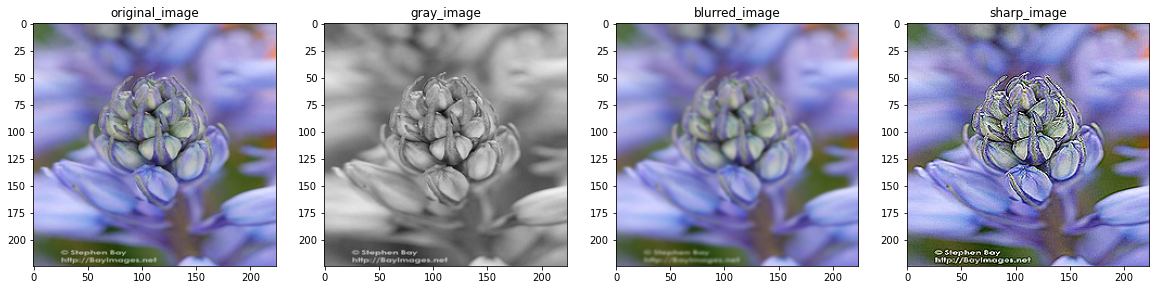

In [158]:
import random
import cv2

# Original Image assigned to variable img_org
img_org = random.choice(X)

# Gray Image
gray_image = cv2.cvtColor(img_org, cv2.COLOR_RGB2GRAY)

# Blur Image
blur_img = cv2.GaussianBlur(img_org,ksize=(5,5),sigmaX=0,sigmaY=0)

# Sharp Image
sharp_filter = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]])

sharp_img = cv2.filter2D(img_org,kernel=sharp_filter,ddepth=-1)

img_title = ['original_image', 'gray_image', 'blurred_image', 'sharp_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([img_org, gray_image, blur_img, sharp_img]):
    plt.subplot(1,4,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

2.2 b , c , d ,e and f has been done in above function only 

## 2.3. Model training and Tuning: [15 Marks]

### Part 2.3 a - Split the data into train and test with 80:20 proportion.

In [79]:
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(1360, 224, 224, 3) (1360,)


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [82]:
# Reshaping the train and test data as per the SL model requirement

X_train_ML = X_train.astype('float32')
X_train_ML = X_train_ML.reshape(X_train_ML.shape[0], 150528) # 224X224X3 = 150528
X_train_ML = X_train_ML/255

X_test_ML = X_test.astype('float32')
X_test_ML = X_test_ML.reshape(X_test_ML.shape[0], 150528)
X_test_ML = X_test_ML/255

#y_train_ML = y_train.reshape(y_train.shape[0], 1)
#y_test_ML = y_test.reshape(y_test.shape[0], 1)


print('Train_Shape:', X_train_ML.shape, y_train.shape)
print('Test_Shape:', X_test_ML.shape, y_test.shape)

Train_Shape: (1088, 150528) (1088,)
Test_Shape: (272, 150528) (272,)


### Part 2.3 b Train a model using any Supervised Learning algorithm and share performance metrics on test data.

In [83]:
# RANDOM FOREST

# Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Model
model_RF = RandomForestClassifier(n_estimators=20,
                                    criterion='gini',
                                    max_depth=5)
model_RF.fit(X_train_ML, y_train)

# Accuracy
pred_RF = model_RF.predict(X_test_ML)
RF_Train = model_RF.score(X_train_ML, y_train)
RF_Test = accuracy_score(y_test, pred_RF)   

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 0.7931985294117647
Test Accuracy: 0.3639705882352941


In [85]:
from sklearn.metrics import classification_report
# View confusion matrix for test data and predictions
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.15      0.14      0.15        14
           1       0.38      0.18      0.24        17
           2       0.55      0.92      0.69        12
           3       0.12      0.15      0.13        13
           4       0.20      0.36      0.26        14
           5       0.38      0.40      0.39        15
           6       0.29      0.20      0.24        20
           7       0.59      0.48      0.53        21
           8       0.42      0.65      0.51        17
           9       0.45      0.25      0.32        20
          10       0.24      0.36      0.29        11
          11       0.21      0.27      0.24        15
          12       0.47      0.40      0.43        20
          13       0.50      0.20      0.29        15
          14       0.17      0.10      0.12        20
          15       0.40      0.33      0.36        12
          16       0.62      0.94      0.75        16

    accuracy              

### Part 2.3 c - C. Train a model using Neural Network and share performance metrics on test data.

In [99]:
# Changing the Target parameter as per the requirement of the NN model

# one hot encode outputs
import pandas as pd
y_train_NN = pd.get_dummies(y_train)
y_test_NN = pd.get_dummies(y_test)

In [100]:
### define model

import tensorflow 
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


# create model
model = Sequential()  
model.add(BatchNormalization(input_shape = (150528,)))  ### Batch_Norm Layer
    
model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(17, activation='softmax'))
    
# Compile model
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

# Fit the model
histroy = model.fit(X_train_ML, y_train_NN, validation_data=(X_test_ML, y_test_NN), epochs=30, batch_size=8, verbose=2)

E:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train on 1088 samples, validate on 272 samples
Epoch 1/30


E:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 - 24s - loss: 2.8945 - acc: 0.0993 - val_loss: 2.8208 - val_acc: 0.0772 - 24s/epoch - 22ms/sample
Epoch 2/30
1088/1088 - 22s - loss: 2.5261 - acc: 0.1949 - val_loss: 2.7567 - val_acc: 0.1213 - 22s/epoch - 21ms/sample
Epoch 3/30
1088/1088 - 22s - loss: 2.3463 - acc: 0.2270 - val_loss: 2.5901 - val_acc: 0.1875 - 22s/epoch - 20ms/sample
Epoch 4/30
1088/1088 - 22s - loss: 2.2430 - acc: 0.2592 - val_loss: 2.3721 - val_acc: 0.2721 - 22s/epoch - 21ms/sample
Epoch 5/30
1088/1088 - 22s - loss: 2.1057 - acc: 0.2895 - val_loss: 2.0102 - val_acc: 0.3235 - 22s/epoch - 20ms/sample
Epoch 6/30
1088/1088 - 22s - loss: 2.0201 - acc: 0.3116 - val_loss: 1.8986 - val_acc: 0.3640 - 22s/epoch - 20ms/sample
Epoch 7/30
1088/1088 - 22s - loss: 1.8706 - acc: 0.3474 - val_loss: 1.8509 - val_acc: 0.3456 - 22s/epoch - 21ms/sample
Epoch 8/30
1088/1088 - 23s - loss: 1.7700 - acc: 0.3833 - val_loss: 1.9605 - val_acc: 0.3419 - 23s/epoch - 21ms/sample
Epoch 9/30
1088/1088 - 23s - loss: 1.6947 - acc: 0.4292 - v

In [107]:
y_pred_1=model.predict(X_test_ML)
y_pred_final_1=[]
for i in y_pred_1:
  y_pred_final_1.append(np.argmax(i))

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final_1))

              precision    recall  f1-score   support

           0       0.17      0.14      0.15        14
           1       0.30      0.41      0.35        17
           2       0.64      0.75      0.69        12
           3       0.33      0.15      0.21        13
           4       0.33      0.43      0.38        14
           5       0.24      0.47      0.32        15
           6       0.23      0.15      0.18        20
           7       0.85      0.52      0.65        21
           8       0.67      0.59      0.62        17
           9       0.35      0.30      0.32        20
          10       0.24      0.36      0.29        11
          11       0.27      0.27      0.27        15
          12       0.85      0.55      0.67        20
          13       0.57      0.27      0.36        15
          14       0.25      0.40      0.31        20
          15       0.31      0.33      0.32        12
          16       1.00      0.94      0.97        16

    accuracy              

In [94]:
# predicting the model on test data
y_pred=model.predict(X_test_ML)

In [109]:
from sklearn.metrics import confusion_matrix
cm_1=confusion_matrix(y_test,y_pred_final_1)

Text(69.0, 0.5, 'Truth')

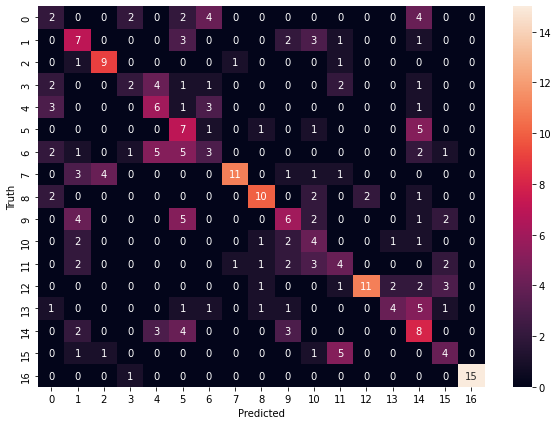

In [111]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm_1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Part 2.3 d - Train a model using a basic CNN and share performance metrics on test data.

In [117]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [121]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [122]:
# Initialising the CNN classifier
CNN = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
CNN.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
CNN.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
CNN.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
CNN.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
CNN.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
CNN.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
CNN.add(Flatten())

# Adding a fully connected layer with 512 neurons
CNN.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.4
CNN.add(Dropout(0.4))


# Adding a fully connected layer with 128 neurons
CNN.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 12 neuron to predict the categorical classifcation
CNN.add(Dense(units = 17, activation = 'softmax'))

CNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 128)     

In [151]:

CNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = CNN.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=20,verbose=2)

Train on 1088 samples, validate on 272 samples
Epoch 1/20


E:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 - 50s - loss: 0.0476 - acc: 0.9853 - val_loss: 4.0711 - val_acc: 0.5074 - 50s/epoch - 46ms/sample
Epoch 2/20
1088/1088 - 42s - loss: 0.0553 - acc: 0.9835 - val_loss: 4.1473 - val_acc: 0.5331 - 42s/epoch - 38ms/sample
Epoch 3/20
1088/1088 - 40s - loss: 0.0418 - acc: 0.9862 - val_loss: 3.4379 - val_acc: 0.5110 - 40s/epoch - 37ms/sample
Epoch 4/20
1088/1088 - 40s - loss: 0.0556 - acc: 0.9853 - val_loss: 3.6319 - val_acc: 0.5000 - 40s/epoch - 37ms/sample
Epoch 5/20
1088/1088 - 40s - loss: 0.0391 - acc: 0.9881 - val_loss: 2.9645 - val_acc: 0.5404 - 40s/epoch - 36ms/sample
Epoch 6/20
1088/1088 - 39s - loss: 0.0298 - acc: 0.9899 - val_loss: 3.7849 - val_acc: 0.5478 - 39s/epoch - 36ms/sample
Epoch 7/20
1088/1088 - 40s - loss: 0.0394 - acc: 0.9899 - val_loss: 3.1861 - val_acc: 0.5184 - 40s/epoch - 36ms/sample
Epoch 8/20
1088/1088 - 39s - loss: 0.0142 - acc: 0.9936 - val_loss: 3.7875 - val_acc: 0.5110 - 39s/epoch - 36ms/sample
Epoch 9/20
1088/1088 - 39s - loss: 0.0226 - acc: 0.9908 - v

Testing the model on validation dataset
Classification Report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.14      0.14      0.14        14
           1       0.25      0.53      0.34        17
           2       0.50      0.58      0.54        12
           3       0.14      0.38      0.20        13
           4       0.25      0.36      0.29        14
           5       0.18      0.20      0.19        15
           6       0.50      0.20      0.29        20
           7       0.43      0.14      0.21        21
           8       0.85      0.65      0.73        17
           9       0.38      0.40      0.39        20
          10       0.00      0.00      0.00        11
          11       1.00      0.07      0.12        15
          12       0.77      0.50      0.61        20
          13       0.72      0.87      0.79        15
          14       0.25      0.30      0.27   

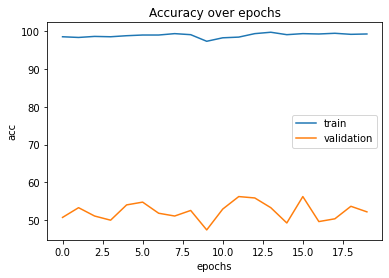

In [152]:
from sklearn.metrics import classification_report
plt.plot(np.array(history.history['acc'])*100)
plt.plot(np.array(history.history['val_acc'])*100)
plt.ylabel('acc')
plt.xlabel('epochs')
print('Testing the model on validation dataset')
predictions= np.argmax(model.predict(X_test),axis=1)
rounded_y = np.argmax(y_test,axis=1)
print('Classification Report'); print('--'*40)
print(classification_report(rounded_y,predictions))
plt.legend(['train','validation'])
plt.title('Accuracy over epochs')
plt.show()

### Part 2.3 e - Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.

E:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


is predicted 16
is labeled 16
predicted probabilities: [[3.9993679e-09 3.5173631e-11 1.6595290e-09 1.8608211e-05 4.0108283e-08
  3.2948986e-07 4.7972463e-07 7.1115491e-10 4.5612058e-05 9.9646111e-11
  4.6938544e-13 1.3490229e-09 2.7519450e-06 9.6095158e-05 5.8263669e-08
  8.9062130e-10 9.9983597e-01]]


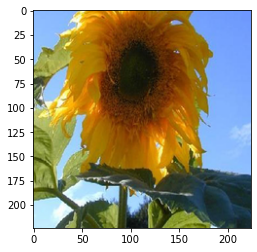

In [156]:
image_index = 27
plt.imshow(X_test[image_index])
pred= CNN.predict(np.reshape(X_test[image_index],[1,224,224,3]))
print("is predicted",pred.argmax())
print("is labeled",rounded_y[image_index])
print("predicted probabilities:",pred)